In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url, index_col = 0)
df.head()

,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
State,,,,,,,,,,,,,,,,,,,,,
AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, AL to ND
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 1000 non-null   float64
 1   Lng                 1000 non-null   float64
 2   Area                995 non-null    object 
 3   Children            993 non-null    float64
 4   Age                 1000 non-null   int64  
 5   Income              1000 non-null   float64
 6   Marital             995 non-null    object 
 7   Gender              995 non-null    object 
 8   ReAdmis             1000 non-null   int64  
 9   VitD_levels         1000 non-null   float64
 10  Doc_visits          1000 non-null   int64  
 11  Full_meals_eaten    1000 non-null   int64  
 12  vitD_supp           1000 non-null   int64  
 13  Soft_drink          1000 non-null   int64  
 14  Initial_admin       995 non-null    object 
 15  HighBlood           1000 non-null   int64  
 16  Stroke      

In [4]:
#The features to analyze: VitD_levels, Doc_visits and TotalCharge

In [5]:
# Display basic statistics for the specified columns
selected_columns = ['VitD_levels', 'Doc_visits', 'TotalCharge']
print(df[selected_columns].describe())

       VitD_levels   Doc_visits  TotalCharge
count  1000.000000  1000.000000  1000.000000
mean     17.992381     4.992000  3240.971613
std       2.056366     1.048349   600.413722
min      11.475314     2.000000  2022.650007
25%      16.620469     4.000000  2822.108670
50%      18.020163     5.000000  3164.679245
75%      19.418254     6.000000  3628.550654
max      24.565463     9.000000  5572.846022


In [6]:
# analyzing feature VitD_levels

In [7]:
mean_VitD_levels = df['VitD_levels'].mean()
mean_VitD_levels

17.992380894860002

In [9]:
median_VitD_levels = df['VitD_levels'].median()
median_VitD_levels

18.020163095

Text(0.5, 1.0, 'Distribution of VitD_levels')

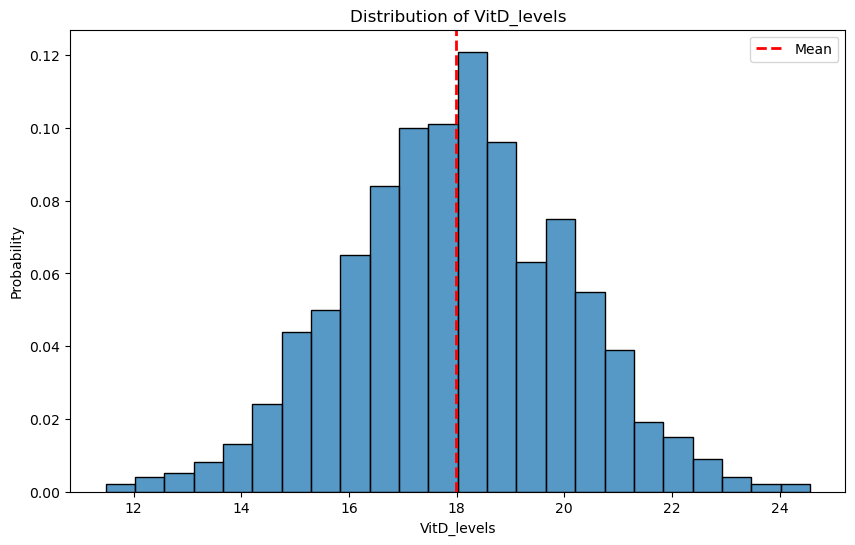

In [17]:
# Add legend and title
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'] ,ax=ax, stat='probability')
ax.axvline(mean_VitD_levels, color = 'red', label='Mean', linestyle='dashed', linewidth=2)
ax.legend();
plt.title(f'Distribution of VitD_levels')

Text(0.5, 1.0, 'Distribution of VitD_levels')

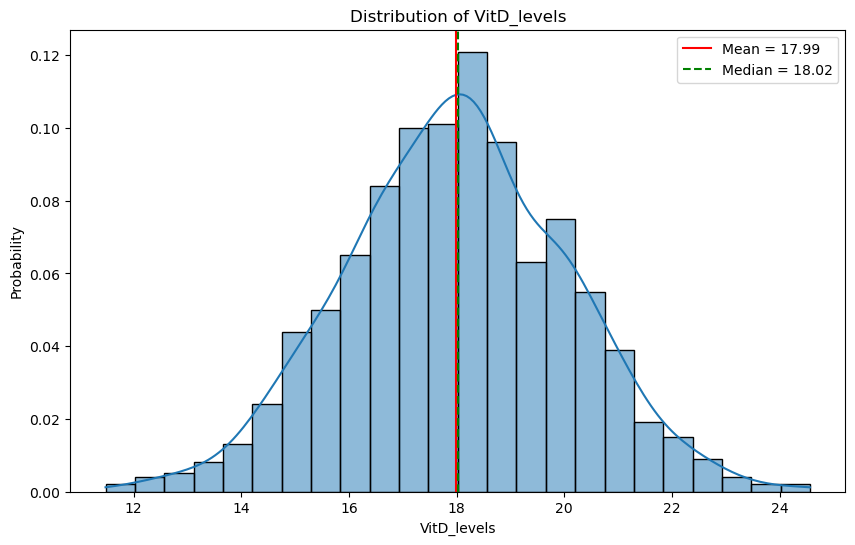

In [29]:
# Assign the column name a variable.
col = 'VitD_levels'

feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')

ax.legend();

plt.title(f'Distribution of VitD_levels')

Text(0.5, 1.0, 'Distribution of VitD_levels')

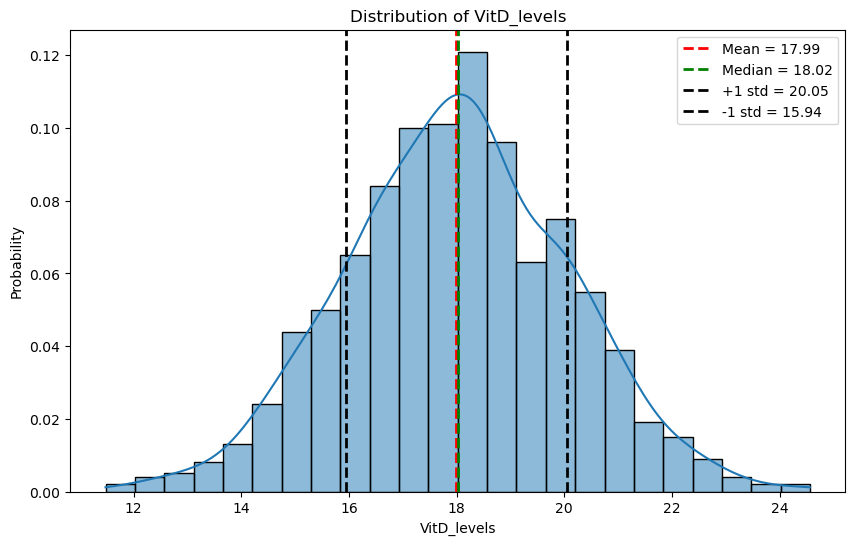

In [31]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}', linestyle='dashed', linewidth=2)

ax.legend();

plt.title(f'Distribution of VitD_levels')

Text(0.5, 1.0, 'Distribution of VitD_levels')

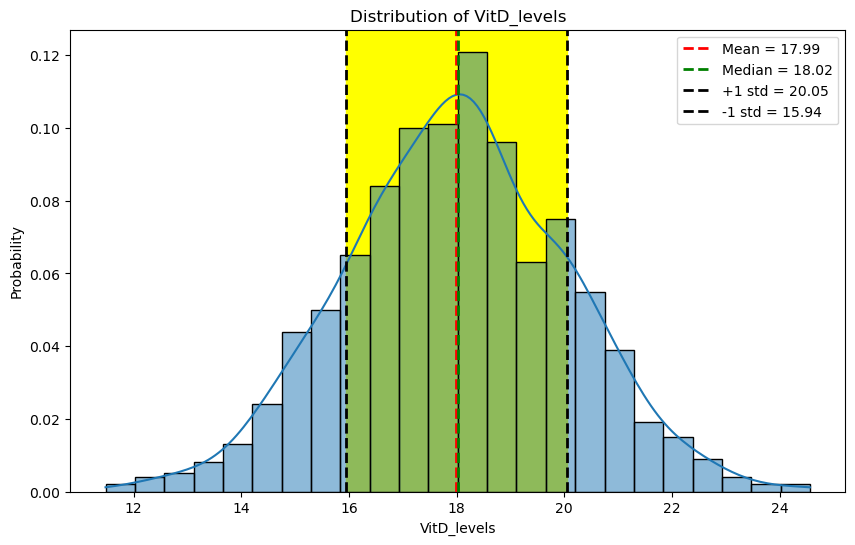

In [30]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

ax.legend();
plt.title(f'Distribution of VitD_levels')

In [34]:
# analyzing feature TotalCharge

In [35]:
mean_TotalCharge = df['TotalCharge'].mean()
mean_TotalCharge

3240.9716133389998

In [37]:
median_TotalCharge = df['TotalCharge'].median()
median_TotalCharge

3164.6792455

Text(0.5, 1.0, 'Distribution of TotalCharge')

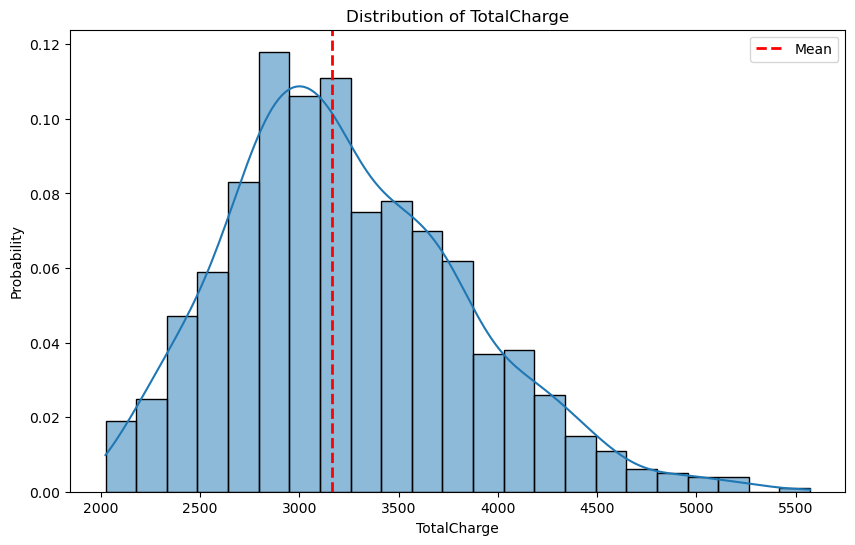

In [48]:
# Add legend and title
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['TotalCharge'] ,ax=ax, stat='probability', kde=True)
ax.axvline(median_TotalCharge, color = 'red', label='Mean', linestyle='dashed', linewidth=2)
ax.legend();
plt.title(f'Distribution of TotalCharge')

Text(0.5, 1.0, 'Distribution of TotalCharge')

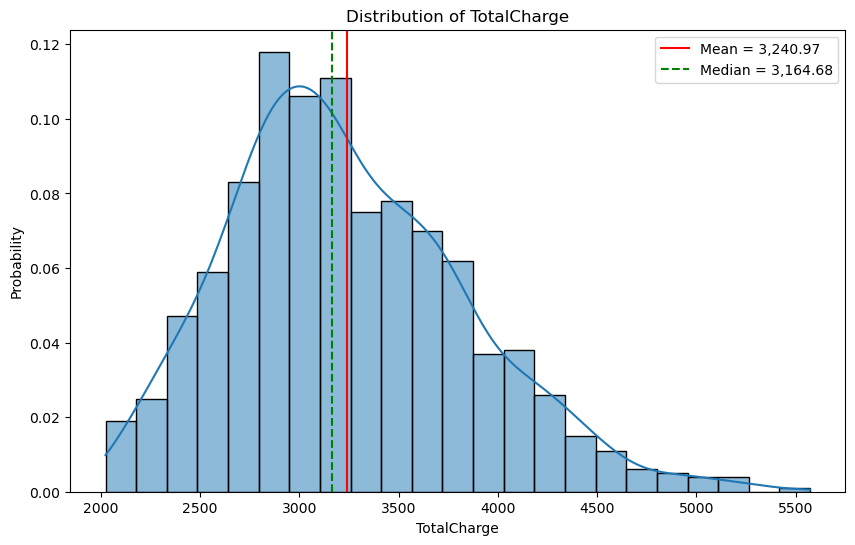

In [41]:
# Assign the column name a variable.
col = 'TotalCharge'

feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')

ax.legend();

plt.title(f'Distribution of TotalCharge')

Text(0.5, 1.0, 'Distribution of TotalCharge')

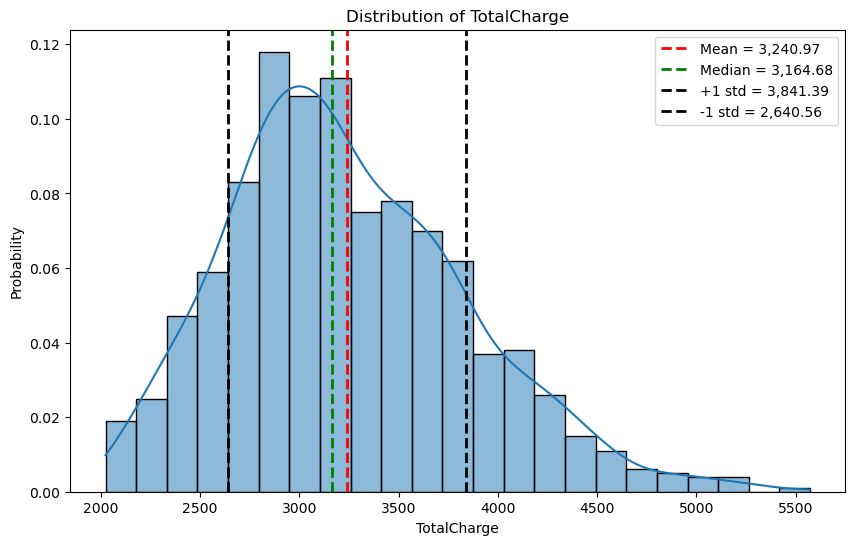

In [42]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}', linestyle='dashed', linewidth=2)

ax.legend();

plt.title(f'Distribution of TotalCharge')

Text(0.5, 1.0, 'Distribution of TotalCharge')

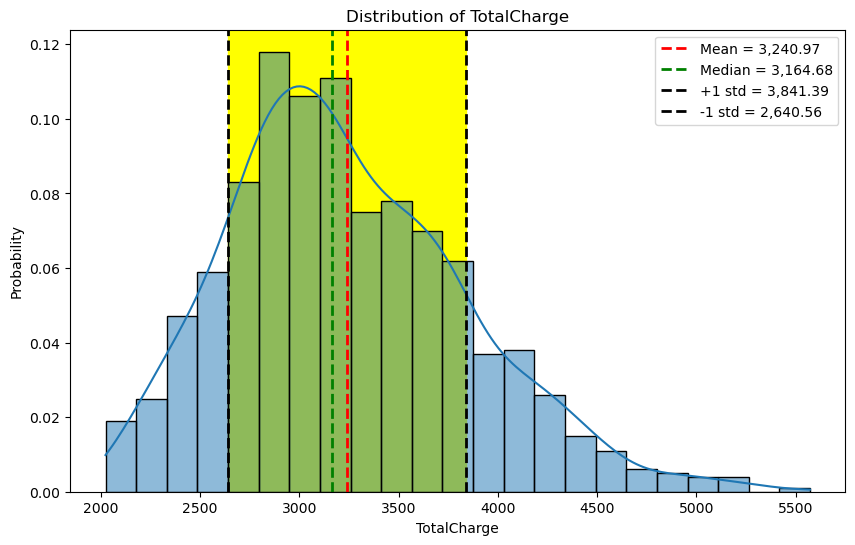

In [43]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

ax.legend();
plt.title(f'Distribution of TotalCharge')

In [ ]:
# # analyzing feature Doc_visits

In [44]:
mean_Doc_visits = df['Doc_visits'].mean()
mean_Doc_visits

4.992

In [45]:
median_Doc_visits = df['Doc_visits'].median()
median_Doc_visits

5.0

Text(0.5, 1.0, 'Distribution of Doc_visits')

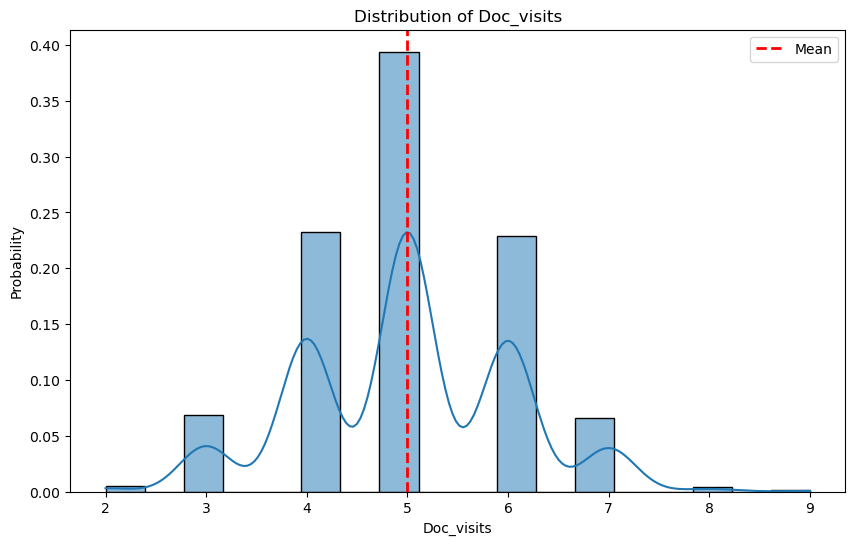

In [47]:
# Add legend and title
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Doc_visits'] ,ax=ax, stat='probability', kde=True)
ax.axvline(mean_Doc_visits, color = 'red', label='Mean', linestyle='dashed', linewidth=2)
ax.legend();
plt.title(f'Distribution of Doc_visits')

Text(0.5, 1.0, 'Distribution of Doc_visits')

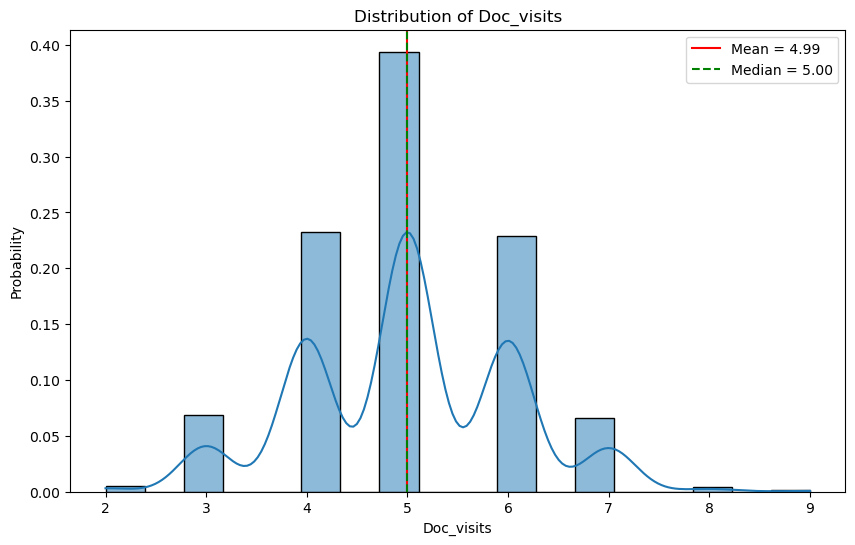

In [50]:
# Assign the column name a variable.
col = 'Doc_visits'

feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')

ax.legend();

plt.title(f'Distribution of Doc_visits')

Text(0.5, 1.0, 'Distribution of Doc_visits')

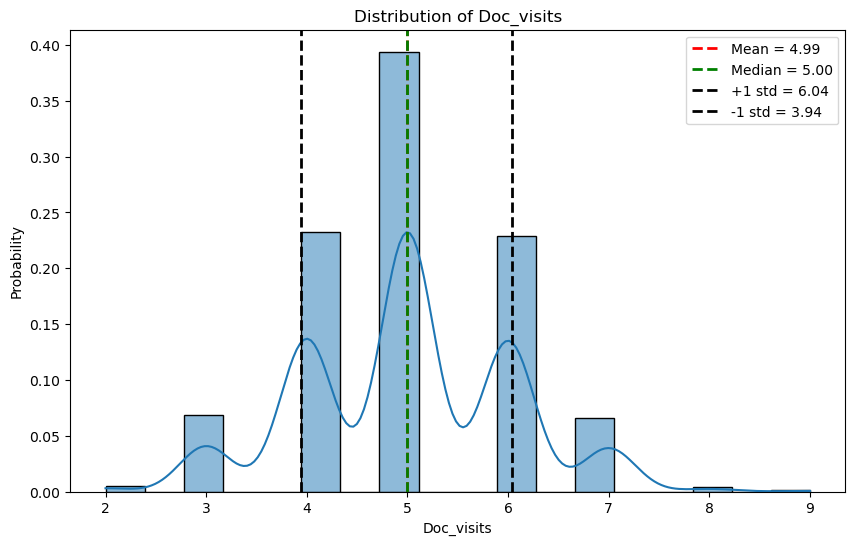

In [51]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}', linestyle='dashed', linewidth=2)

ax.legend();

plt.title(f'Distribution of Doc_visits')

Text(0.5, 1.0, 'Distribution of Doc_visits')

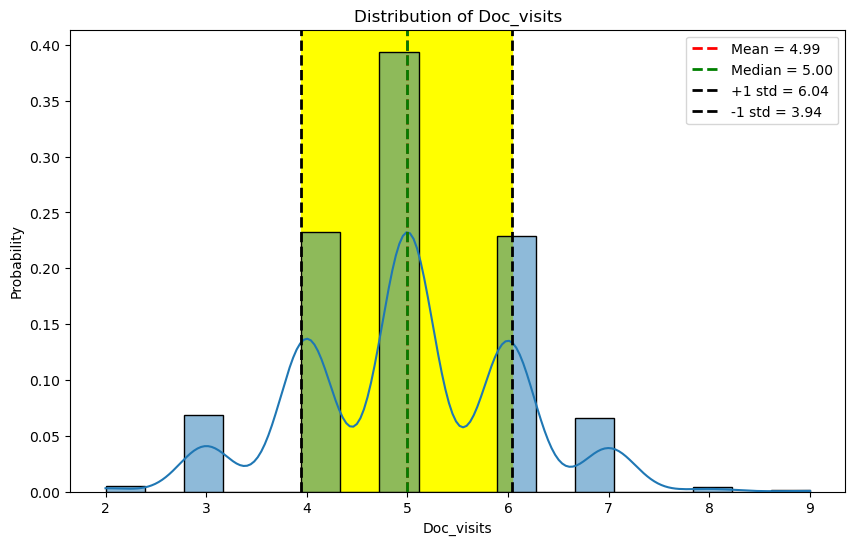

In [52]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}', linestyle='dashed', linewidth=2)
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

ax.legend();
plt.title(f'Distribution of Doc_visits')

In [ ]:
# a. VitD_levels
# b. TotalCharge
# c. Docvisits

In [ ]:
# Is it Discrete or Continuous?
# a. Continuous
# b. Continuous
# c. Continuous

In [ ]:
# Does it have a skew? If so, which direction (+/-)
# a. Normal curve
# b. left skew
# c. normal curve

In [ ]:
# What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
#a. Mesokurtic
#b. Mesokurtic
#c. Platykurtic curve